# Basalts classification project

## Table of contents

[Introduction](#Introduction)  
[Necessary imports](#Necessary-imports)  
[Data loading and inspection](#Data-loading-and-inspection)  
[Rejecting unnecessary columns](#Rejecting-unnecessary-columns)  
[Major elements](#Major-elements)  
&emsp; [Converting iron and dropping unnecessary columns](#Converting-iron-and-dropping-unnecessary-columns)  
&emsp; [Oxide to element conversion](#Oxide-to-element-conversion)  
[Trace elements](#Trace-elements)  
[Rejecting the data without any information](#Rejecting-the-data-without-any-information)  
[Compositional Data Transformation](#Compositional-Data-Transformation)  
[Analysis](#Analysis)  
&emsp; [Visualization of the data](#Visualization-of-the-data)  
&emsp; &emsp; &emsp; [Correlation heatmap](#Correlation-heatmap)  
&emsp; &emsp; &emsp; [Plotting data with use of PCA](#Plotting-data-with-use-of-PCA)  
&emsp; [Classification](#Classification)  
&emsp; &emsp; &emsp; [K-nearest neighbors](#K-nearest-neighbors)  
&emsp; &emsp; &emsp; [Decision tree](#Decision-tree)  
&emsp; &emsp; &emsp; [Random forest](#Random-forest)  
&emsp; [Results](#Results)  
[References](#References)

## Introduction
[Up](#Basalts-classification-project)


Basalts are definitelly among the most important of rocks in all the Earth Sciences. These rocks originate from the upper mantle and build up whole oceanic crust, what makes them most common volcanic rock type on the Earth. Basalts are also main constituent of lunar maria and were found in meteorites. However, they are of especial from tectonic point of view. Their chemical composition (especially trace elements) allows for distingushing tectonic environments of their origin. That makes basalts ideal candidates to utilize classification algorithms on them. 

This project makes an attempt to classify basalts with use of machine learning algorithms aviable via scikit-learn module for Python. First, the data obtained from geochemical database GEOROC will be cleaned and prepared, as the dataset consists of more data than is desired to use in this project. Then, part of the data will be recalculated, as it is casual in geology to report major element analyses as so called major element oxides (e.g. - to report SiO2 instead of Si). After that, due to the nature of geochemical data, which are nearly always so-called compositional data, the results will be transformed to their log-ratios. After that, we will attempt to visualize the data. However, due to multidimensional nature of the dataset, PCA and LDA are necessary to plot the data. Finally, we will use k-nearest neighbors, desision trees and random forests algorithms and compare their performance.

Hope you'll be having fun checking this notebook!
![Oceanic plates](2008_age_of_oceans_plates.jpg)
*[Wikimedia Commons](https://commons.wikimedia.org/wiki/File:2008_age_of_oceans_plates.jpg)*

## Necessary imports
[Up](#Basalts-classification-project)

In [354]:
# Basic Python modules
import os
import re
import warnings

# Analytical Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# "wooden" modules
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings("ignore")

## Data loading and inspection
[Up](#Basalts-classification-project)

In [3]:
# encoding was changed to 'latin-1', because of the error that occured while loading the data
alldata = pd.read_csv("BASALT_part1.csv", encoding='latin-1')

In [4]:
display(alldata)

,CITATIONS,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE MIN,LATITUDE MAX,LONGITUDE MIN,LONGITUDE MAX,LAND OR SEA,ELEVATION MIN,...,RE187_OS188,HF176_HF177,HE3_HE4,HE3_HE4(R/R(A)),HE4_HE3,HE4_HE3(R/R(A)),K40_AR40,AR40_K40,UNIQUE_ID,Unnamed: 171
0,[4742],CONVERGENT MARGIN,HONSHU ARC / SOUTHWESTERN HONSHU ARC / MISHIMA...,NaN,33.0000,35.0000,130.0000,133.0000,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100048,NaN
1,[4683],OCEAN ISLAND,AUSTRAL-COOK ISLANDS / RAROTONGA,NaN,-21.2500,-21.2500,-159.7500,-159.7500,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100058,NaN
2,[7321][2953][2335][4190],CONVERGENT MARGIN,KURILE ARC / KURILE ARC / BROU(GH)TON(A) / BRO...,NaN,47.1200,47.1200,152.2300,152.2300,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-B-17-603,NaN
3,[6818][3042],CONVERGENT MARGIN,KURILE ARC / KURILE ARC / BROU(GH)TON(A) / BRO...,NaN,47.1200,47.1200,152.2300,152.2300,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-V-15-307,NaN
4,[4750],OCEAN ISLAND,CANARY ISLANDS / GRAN CANARIA,HOLE 956B,27.6149,27.6149,-16.1633,-16.1633,SAQ,-3453.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100107,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,"[23592] MUNDL-PETERMEIER A., WALKER R. J., FIS...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11735,"[23653] HARRISON L. N., WEIS D., GARCIA M. O.:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11736,"[23819] HANNA H. D., LIU XIAO-MING, PARK Y.-R....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11737,"[23927] FENG WANYI, ZHU YONGFENG: PETROLOGY...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, the uploaded file is a mix of both the data and references. We have to either get rid of the citations, or to split dataframe in two, to store citaions as different variable.

Full references differ from sources in such way, that these contain uppercase letters. So, let's filter the first column of the dataframe.

In [5]:
citations = alldata[alldata.CITATIONS.str.contains(r'[A-Z]+')]["CITATIONS"]
citations.head()

10670    Abbreviations: MET: METAMORPHIC ROCK; PEG: PEG...
10671                                          References:
10672    [14] HEMOND C., HOFMANN A. W., HEUSSER G., CON...
10673    [15] MOORE J. G., BRYAN W. B., BEESON M. H., N...
10674    [25] MOORE J. G., CLAGUE D. A.:    COASTAL LAV...
Name: CITATIONS, dtype: object

So now, let's drop the unnecessary rows in our data

In [6]:
# We're saving alldata deep copy as DataFrame named 'raw'
raw = alldata.copy()

In [7]:
# We're dropping all the row indices that are indices of citations series
alldata.drop(index=citations.index, inplace=True)

In [8]:
alldata.head()

,CITATIONS,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE MIN,LATITUDE MAX,LONGITUDE MIN,LONGITUDE MAX,LAND OR SEA,ELEVATION MIN,...,RE187_OS188,HF176_HF177,HE3_HE4,HE3_HE4(R/R(A)),HE4_HE3,HE4_HE3(R/R(A)),K40_AR40,AR40_K40,UNIQUE_ID,Unnamed: 171
0,[4742],CONVERGENT MARGIN,HONSHU ARC / SOUTHWESTERN HONSHU ARC / MISHIMA...,NaN,33.0000,35.0000,130.0000,133.0000,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100048,NaN
1,[4683],OCEAN ISLAND,AUSTRAL-COOK ISLANDS / RAROTONGA,NaN,-21.2500,-21.2500,-159.7500,-159.7500,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100058,NaN
2,[7321][2953][2335][4190],CONVERGENT MARGIN,KURILE ARC / KURILE ARC / BROU(GH)TON(A) / BRO...,NaN,47.1200,47.1200,152.2300,152.2300,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-B-17-603,NaN
3,[6818][3042],CONVERGENT MARGIN,KURILE ARC / KURILE ARC / BROU(GH)TON(A) / BRO...,NaN,47.1200,47.1200,152.2300,152.2300,SAE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-V-15-307,NaN
4,[4750],OCEAN ISLAND,CANARY ISLANDS / GRAN CANARIA,HOLE 956B,27.6149,27.6149,-16.1633,-16.1633,SAQ,-3453.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100107,NaN


Let's now inspect the columns in our samples.

In [9]:
column_names = alldata.columns.tolist()
column_names[:40]

['CITATIONS',
 'TECTONIC SETTING',
 'LOCATION',
 'LOCATION COMMENT',
 'LATITUDE MIN',
 'LATITUDE MAX',
 'LONGITUDE MIN',
 'LONGITUDE MAX',
 'LAND OR SEA',
 'ELEVATION MIN',
 'ELEVATION MAX',
 'SAMPLE NAME',
 'ROCK NAME',
 'MIN. AGE (YRS.)',
 'MAX. AGE (YRS.)',
 'GEOL.',
 'AGE',
 'ERUPTION DAY',
 'ERUPTION MONTH',
 'ERUPTION YEAR',
 'ROCK TEXTURE',
 'ROCK TYPE',
 'DRILL DEPTH MIN',
 'DRILL DEPTHAX',
 'ALTERATION',
 'MINERAL',
 'MATERIAL',
 'SIO2(WT%)',
 'TIO2(WT%)',
 'B2O3(WT%)',
 'AL2O3(WT%)',
 'CR2O3(WT%)',
 'FE2O3(WT%)',
 'FEO(WT%)',
 'FEOT(WT%)',
 'CAO(WT%)',
 'MGO(WT%)',
 'MNO(WT%)',
 'NIO(WT%)',
 'K2O(WT%)']

Our aim is to classify the basalts from various tectonic environments only by their geochemistry (that is - elemental content). So, we do not need other columns - especially with latitude and longitude, which may cause geography to influence results of our classification.

The first column with geochemical information is 'SIO2(WT%)'.

In [10]:
non_chem_columns = column_names[:column_names.index("SIO2(WT%)")]
df_no_chemistry = alldata[non_chem_columns]

For our quantitative analysis, we will need columns with geochemical information, IDs and tecotnic environment information. Column "AGE" may be usefull as well - rocks that are older (and therefore - severely weathered) may give different results than younger, less weathered rocks.

In [11]:
unnecessary = non_chem_columns[2:]
unnecessary.remove("AGE")

In [12]:
basalts = alldata.drop(columns=unnecessary)

In [13]:
basalts.drop(columns="Unnamed: 171", inplace=True)

In [14]:
basalts.head()

,CITATIONS,TECTONIC SETTING,AGE,SIO2(WT%),TIO2(WT%),B2O3(WT%),AL2O3(WT%),CR2O3(WT%),FE2O3(WT%),FEO(WT%),...,RE187_OS186,RE187_OS188,HF176_HF177,HE3_HE4,HE3_HE4(R/R(A)),HE4_HE3,HE4_HE3(R/R(A)),K40_AR40,AR40_K40,UNIQUE_ID
0,[4742],CONVERGENT MARGIN,NaN,46.67,1.96,NaN,13.14,NaN,2.35,7.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100048
1,[4683],OCEAN ISLAND,NaN,45.97,2.91,NaN,11.86,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100058
2,[7321][2953][2335][4190],CONVERGENT MARGIN,NaN,51.53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-B-17-603
3,[6818][3042],CONVERGENT MARGIN,HOLOCENE [6818] / QUATERNARY [3042],58.22,0.67,NaN,16.30,NaN,2.24,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008-V-15-307
4,[4750],OCEAN ISLAND,MIOCENE [4750],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100107


## Rejecting unnecessary columns
[Up](#Basalts-classification-project)

We will now reject the columns, that are not of our interest.

In [15]:
len(basalts.columns)

147

So, we have 147 columns containing geochemical information. We're analyzing elemental composition, so volatile elements, isotopic data and geochronological ages are not necessary for us. Column names of our interest contain, besides the name of the chemical compound/element, contain one of two units - either **WT%** (weight percent) or **PPM** (parts per million). We can filter, therefore, our list.

In [16]:
# We will filter the list for major elements - all expressed in weight percent
major_elements = list(filter(re.compile(".+(WT%)").match, column_names))

# Now, we're filtering the list for trace elements - that is, minor elements and rare earth elements
trace_elements = list(filter(re.compile(".+(PPM)").match, column_names))

elements = major_elements + trace_elements

Columns CITATIONS, AGE and UNIQUE_ID should be rejected for now, but we may want to use them later. We will store these columns in another DataFrame

In [17]:
other_information = basalts[["CITATIONS", "AGE", "UNIQUE_ID"]]

basalts.drop(columns=["CITATIONS", "AGE", "UNIQUE_ID"], inplace=True)

In [18]:
geochem_all = basalts.copy()

basalts = basalts[["TECTONIC SETTING"] + elements]

Major elements are expressed as oxides in weight percent - which is traditional way to express geochemical data from rocks. However, for our analysis, we have to transform major element oxides to major elements. For convenience, we will split the DataFrame in two parts, one with major, one with minor elements. After that - we will concatenate all three dataframes into one

In [19]:
basalts_major = basalts[major_elements]
basalts_trace = basalts[trace_elements]
basalts_settings = basalts[["TECTONIC SETTING"]]

### Major elements
[Up](#Basalts-classification-project)

We will now inspect columns with major element oxides, reject the ones without any information and recalculate major oxides expressed in weight percent to major elements in weight percent

In [20]:
basalts_major.head()

,SIO2(WT%),TIO2(WT%),B2O3(WT%),AL2O3(WT%),CR2O3(WT%),FE2O3(WT%),FEO(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),...,OH(WT%),CH4(WT%),SO2(WT%),SO3(WT%),SO4(WT%),S(WT%),LOI(WT%),VOLATILES(WT%),O(WT%),OTHERS(WT%)
0,46.67,1.96,NaN,13.14,NaN,2.35,7.37,NaN,8.87,14.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.97,2.91,NaN,11.86,NaN,NaN,NaN,11.42,9.74,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,1.61,NaN,NaN,NaN
2,51.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.97,...,NaN,NaN,NaN,NaN,NaN,NaN,0.29,NaN,NaN,NaN
3,58.22,0.67,NaN,16.30,NaN,2.24,5.77,NaN,7.04,3.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.007,NaN,NaN,NaN,NaN


#### Converting iron and dropping unnecessary columns
[Up](#Basalts-classification-project)

Before we recalculate oxides to elements, we can drop the columns that have more than half of the data as null values. First, they just bear no useful information for us - most of these information is not of our direct interest, when it comes to rock classification. Second, obviously, as these columns are more nulls than real values, they won't probably contribute substantially to our results.

In [21]:
major_null_counts = basalts_major.isnull().sum() / len(basalts_major)
major_null_counts.sort_values(ascending=False)

OTHERS(WT%)       1.000000
SO2(WT%)          1.000000
O(WT%)            1.000000
H2OT(WT%)         1.000000
CO1(WT%)          1.000000
OH(WT%)           1.000000
CH4(WT%)          1.000000
CL2(WT%)          1.000000
SO4(WT%)          1.000000
B2O3(WT%)         1.000000
VOLATILES(WT%)    1.000000
SO3(WT%)          0.995876
NIO(WT%)          0.994377
F(WT%)            0.982474
S(WT%)            0.982099
CL(WT%)           0.981443
CR2O3(WT%)        0.980131
H2O(WT%)          0.953889
CO2(WT%)          0.948360
H2OM(WT%)         0.930366
H2OP(WT%)         0.926617
FEO(WT%)          0.828210
FE2O3(WT%)        0.785473
LOI(WT%)          0.555201
FEOT(WT%)         0.313871
P2O5(WT%)         0.150797
MNO(WT%)          0.133365
NA2O(WT%)         0.123899
AL2O3(WT%)        0.122868
CAO(WT%)          0.122680
TIO2(WT%)         0.122118
MGO(WT%)          0.118557
SIO2(WT%)         0.112465
K2O(WT%)          0.110216
dtype: float64

In [22]:
major_drop_columns = major_null_counts[major_null_counts > 0.5].index.tolist()
major_drop_columns

['B2O3(WT%)',
 'CR2O3(WT%)',
 'FE2O3(WT%)',
 'FEO(WT%)',
 'NIO(WT%)',
 'H2O(WT%)',
 'H2OP(WT%)',
 'H2OM(WT%)',
 'H2OT(WT%)',
 'CO2(WT%)',
 'CO1(WT%)',
 'F(WT%)',
 'CL(WT%)',
 'CL2(WT%)',
 'OH(WT%)',
 'CH4(WT%)',
 'SO2(WT%)',
 'SO3(WT%)',
 'SO4(WT%)',
 'S(WT%)',
 'LOI(WT%)',
 'VOLATILES(WT%)',
 'O(WT%)',
 'OTHERS(WT%)']

Both Fe2O3 and FeO are more than 50% null values. Before we drop all the columns, we may use these two to calculate values to substitute for NULLs in FeOT (total FeO) column. 

This happens because iron occurs in geological environment mainly in two forms: one is FeO, another one is Fe2O3. Both oxides are measured separately by analytical instruments used in geochemistry. However, of our interest is total amount of iron in our sample - which is column FeOT, which is sum of FeO and Fe2O3 ***recalculated*** to FeO. Recalculation is necessary, as iron in FeO (which has molecular mass of $55.847 + 15.9994 = 71.8464$) contributes somewhat more to the mass than in case of Fe2O3 (of which molecular mass is $2 \cdot 55.847 + 3 \cdot 15.9994 = 159.6922$) per one unit weight. This also means that wherever we have NULL value in FeOT (total iron oxide) and we have values for Fe2O3 and FeO, we can multiply Fe2O3 by conversion factor (0.8998) and sum both values to get the value for total FeO. 

After we do that, we will drop unnecessary columns.

In [23]:
basalts_major["FEOT(WT%)"].fillna((basalts_major["FE2O3(WT%)"] * 0.8998 + basalts_major["FEO(WT%)"]).round(2), inplace=True)

In [24]:
basalts_major.drop(columns=major_drop_columns, inplace=True)

We're renaming the columns - let's get rid of "(WT%)" part in our `basalts_major` DataFrame

In [25]:
major_columns = basalts_major.columns.str.replace("\(WT%\)", "")
basalts_major.columns = major_columns

In [26]:
basalts_major.head()

,SIO2,TIO2,AL2O3,FEOT,CAO,MGO,MNO,K2O,NA2O,P2O5
0,46.67,1.96,13.14,9.48,8.87,14.21,0.12,0.99,2.84,0.31
1,45.97,2.91,11.86,11.42,9.74,11.34,0.18,0.56,2.97,0.51
2,51.53,NaN,NaN,NaN,NaN,7.97,NaN,1.46,NaN,NaN
3,58.22,0.67,16.30,7.79,7.04,3.36,0.14,2.09,3.46,0.21
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Oxide to element conversion
[Up](#Basalts-classification-project)

Now, let's recalculate oxides to elements. Convesion factors used from [this website](https://www.geol.umd.edu/~piccoli/probe/molweight.html):

In [27]:
ox_to_el_conversion = {'SIO2':0.467439,
                'TIO2':0.599508,
                'AL2O3':0.529251,
                'FEOT':0.777311,
                'CAO':0.714701,
                'MGO':0.603036,
                'MNO':0.774457,
                'K2O':0.830147, 
                'NA2O':0.741857,
                'P2O5':0.436421,
                'H2O':0.111694,
                'CO2':0.272916
               }

In [28]:
# We're creating an empty DataFrame for elemental data from the rocks
basalts_major_elements = pd.DataFrame()

# And now - we're iterating over DataFrame columns to convert them from major oxides
# to major elements
for oxide, column in basalts_major.iteritems():
    basalts_major_elements[oxide] = column * ox_to_el_conversion[oxide]
    
basalts_major_elements.head()

,SIO2,TIO2,AL2O3,FEOT,CAO,MGO,MNO,K2O,NA2O,P2O5
0,21.815378,1.175036,6.954358,7.368908,6.339398,8.569142,0.092935,0.821846,2.106874,0.135291
1,21.488171,1.744568,6.276917,8.876892,6.961188,6.838428,0.139402,0.464882,2.203315,0.222575
2,24.087132,NaN,NaN,NaN,NaN,4.806197,NaN,1.212015,NaN,NaN
3,27.214299,0.401670,8.626791,6.055253,5.031495,2.026201,0.108424,1.735007,2.566825,0.091648
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, now we have major elements expressed as weight percent of an element in a rock. Now, we have to transform the numbers to parts per million. We will also round the numbers to the full values, as most of analytical devices for measuring chemical composition of materials have detection limits not smaller than 1 ppm.

In [29]:
basalts_major_ppm = basalts_major_elements * 10000 
basalts_major_ppm = basalts_major_ppm.round(0)

Therefore, our major elements table is ready. Now, we will transform trace elements table.

### Trace elements
[Up](#Basalts-classification-project)

We will now inspect columns with trace elements (as those are of our greatest interest) and drop the ones that bear no information

In [30]:
basalts_trace.head()

,LI(PPM),BE(PPM),B(PPM),C(PPM),CO2(PPM),F(PPM),NA(PPM),MG(PPM),AL(PPM),P(PPM),...,OS(PPM),IR(PPM),PT(PPM),AU(PPM),HG(PPM),TL(PPM),PB(PPM),BI(PPM),TH(PPM),U(PPM)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.97,0.83
2,NaN,0.75,6.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.053,3.1,NaN,2.70,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
trace_null_counts = basalts_trace.isnull().sum() / len(basalts_trace)

We will drop the data, that bear no information again

In [32]:
trace_drop_columns = trace_null_counts[trace_null_counts > 0.6].index.tolist()
# print(trace_drop_columns)

In [33]:
basalts_trace.drop(columns=trace_drop_columns, inplace=True)

In [34]:
basalt_data = pd.concat([basalts_settings, basalts_major_ppm, basalts_trace], axis=1)
basalt_data.head()

,TECTONIC SETTING,SIO2,TIO2,AL2O3,FEOT,CAO,MGO,MNO,K2O,NA2O,...,DY(PPM),HO(PPM),ER(PPM),YB(PPM),LU(PPM),HF(PPM),TA(PPM),PB(PPM),TH(PPM),U(PPM)
0,CONVERGENT MARGIN,218154.0,11750.0,69544.0,73689.0,63394.0,85691.0,929.0,8218.0,21069.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCEAN ISLAND,214882.0,17446.0,62769.0,88769.0,69612.0,68384.0,1394.0,4649.0,22033.0,...,5.15,0.84,2.03,1.43,NaN,5.72,NaN,NaN,3.97,0.83
2,CONVERGENT MARGIN,240871.0,NaN,NaN,NaN,NaN,48062.0,NaN,12120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,2.70,NaN
3,CONVERGENT MARGIN,272143.0,4017.0,86268.0,60553.0,50315.0,20262.0,1084.0,17350.0,25668.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OCEAN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The trace element data now is ready.

### Renaming the columns
[Up](#Basalts-classification-project)

For convenience, we will rename the columns in our DataFrame - the names of the elements should be just as in the periodic table

In [35]:
# trace elements
trace_names = basalts_trace.columns.str.replace("\(PPM\)", "").str.capitalize().tolist()

In [36]:
# major_elements

major_names = []

for name in major_columns:
    if name[1].isdigit():
        name = name[:1]
    else:
        name = name[:2]
    major_names.append(name.capitalize())

major_names

['Si', 'Ti', 'Al', 'Fe', 'Ca', 'Mg', 'Mn', 'K', 'Na', 'P']

In [37]:
new_columns = [basalt_data.columns[0]] + major_names + trace_names

In [38]:
basalt_data.columns = new_columns

### Rejecting the data without any information
[Up](#Basalts-classification-project)

As our dataset is compiled from various published sources, not all the data will have the information that is necessary for us. Therefore, what we have to do is to drop the rows that have not enough sufficient data for further analysis.

#### Empty rows
[Up](#Basalts-classification-project)

Let us now inspect if there are any rows that have no data. These rows should be removed from our analysis - they bear not any kind of information and we cannot infer any values on them.

In [44]:
no_data = basalt_data.sum(axis=1)

In [45]:
np.sum(no_data == 0)

588

So, we will drop 588 rows

In [46]:
# We'll make a backup copy of basalt_data DataFrame

backup_basalts = basalt_data.copy()

In [47]:
no_data_indices = no_data[no_data == 0].index

In [48]:
basalt_data.drop(index=no_data_indices, inplace=True)

The resulting DataFrame we will use as an input for our first model

```python
basalts_full = basalt_data.copy()

median_full = basalts_full.median()

basalts_full.fillna(value=median_full, axis=0, inplace=True)
```

#### Tectonic settings without enough information
[Up](#Basalts-classification-project)

Let's inspect a DataFrame right now. Let's see, how many NULL values we have in each of our tectonic settings

In [49]:
tectonic = "TECTONIC SETTING"

In [50]:
element_cols = basalt_data.columns[1:]

In [51]:
# NULL counts per each trace element in each tectonic setting
tectonic_nulls = pd.concat([basalt_data[tectonic], basalt_data[trace_names].isnull()],axis=1).groupby(tectonic).sum()

# value counts per each tectonic setting
tectonic_counts = basalt_data[tectonic].value_counts()

tectonic_nulls.divide(tectonic_counts, axis=0).median(axis=1).sort_values(ascending=False)

SUBMARINE RIDGE                                0.880734
OCEAN ISLAND                                   0.577759
CONTINENTAL FLOOD BASALT                       0.501149
SEAMOUNT                                       0.467033
RIFT VOLCANICS                                 0.461538
CONVERGENT MARGIN                              0.432284
INTRAPLATE VOLCANICS                           0.214086
ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)    0.203863
OCEANIC PLATEAU                                0.147059
COMPLEX VOLCANIC SETTINGS                      0.125000
dtype: float64

In [52]:
tectonic_counts.sort_values(ascending=False)

CONVERGENT MARGIN                              2828
CONTINENTAL FLOOD BASALT                       2612
INTRAPLATE VOLCANICS                           2151
OCEAN ISLAND                                   1196
RIFT VOLCANICS                                  611
ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)     233
SEAMOUNT                                        182
SUBMARINE RIDGE                                 109
OCEANIC PLATEAU                                 102
COMPLEX VOLCANIC SETTINGS                        24
Name: TECTONIC SETTING, dtype: int64

From the inspection above, we see that Submarine Ridges have median of more than 88% of colums with null values, for Ocean Islands it is around 57% and Continental Flood Basalts - around 50%. We have to reject the data, that have more than 16 empty values in total in trace elements colums - these are probably lacking too much data

In [53]:
over_16_nulls = basalt_data[trace_names].isnull().sum(axis=1) > 16

# Let's see what is left
basalt_data[~over_16_nulls].groupby(tectonic).count()[trace_names]

,Sc,V,Cr,Co,Ni,Cu,Zn,Ga,Rb,Sr,...,Dy,Ho,Er,Yb,Lu,Hf,Ta,Pb,Th,U
TECTONIC SETTING,,,,,,,,,,,,,,,,,,,,,
ARCHEAN CRATON (INCLUDING GREENSTONE BELTS),170,183,183,122,167,143,154,141,197,197,...,183,160,183,197,197,172,163,161,193,197
COMPLEX VOLCANIC SETTINGS,0,21,21,21,21,21,0,0,21,21,...,21,21,21,21,21,21,21,21,21,21
CONTINENTAL FLOOD BASALT,1289,1317,1360,585,1424,1263,1193,1152,1427,1428,...,489,501,512,629,626,564,473,1173,1384,650
CONVERGENT MARGIN,1199,1437,1471,957,1577,866,978,707,1743,1754,...,1563,1304,1561,1708,1514,1482,1395,1433,1602,1475
INTRAPLATE VOLCANICS,1372,1507,1503,1458,1633,1102,1046,1173,1801,1803,...,1666,1613,1644,1768,1739,1675,1612,1274,1755,1582
OCEAN ISLAND,423,404,428,268,455,315,366,349,494,512,...,376,349,355,477,479,428,381,367,479,383
OCEANIC PLATEAU,61,86,86,49,86,49,61,59,86,86,...,74,74,74,86,86,86,86,27,86,74
RIFT VOLCANICS,311,282,331,279,321,133,156,193,330,330,...,188,176,177,285,281,283,279,215,333,319
SEAMOUNT,78,73,90,78,91,53,51,18,106,105,...,78,91,78,79,90,93,54,83,89,86


In [54]:
backuped_basalts = basalts.copy()

In [55]:
basalts = basalt_data[~over_16_nulls]

We will clean our DataFrame - null values will be substituted with a median

In [56]:
# calculate the median value
median_val = basalts.median()

In [57]:
basalts.fillna(value=median_val, axis=0, inplace=True)
basalts

,TECTONIC SETTING,Si,Ti,Al,Fe,Ca,Mg,Mn,K,Na,...,Dy,Ho,Er,Yb,Lu,Hf,Ta,Pb,Th,U
1,OCEAN ISLAND,214882.0,17446.0,62769.0,88769.0,69612.0,68384.0,1394.0,4649.0,22033.0,...,5.15,0.84,2.03,1.43,0.31,5.72,0.705729,3.38,3.97,0.830
8,CONVERGENT MARGIN,232972.0,4137.0,103310.0,74466.0,84406.0,35157.0,1471.0,249.0,9273.0,...,2.07,0.46,1.29,1.37,0.21,0.61,0.012000,1.69,0.08,0.037
9,INTRAPLATE VOLCANICS,235870.0,6355.0,84680.0,82006.0,60035.0,39800.0,1317.0,4649.0,22404.0,...,4.59,0.93,2.81,2.72,0.40,1.80,0.200000,1.50,1.70,0.100
10,INTRAPLATE VOLCANICS,226334.0,6535.0,86056.0,86903.0,64538.0,44082.0,1549.0,1411.0,20253.0,...,4.05,0.87,2.50,2.29,0.36,2.00,0.100000,0.70,1.60,0.010
11,INTRAPLATE VOLCANICS,222968.0,6055.0,91084.0,87603.0,71327.0,48122.0,1394.0,3819.0,13799.0,...,3.83,0.82,2.49,1.91,0.31,0.70,0.090000,1.20,0.50,0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10664,INTRAPLATE VOLCANICS,227175.0,17386.0,74624.0,76954.0,109349.0,28946.0,1549.0,2490.0,5193.0,...,5.40,1.00,2.60,2.10,0.30,5.30,2.200000,3.38,2.40,0.700
10665,INTRAPLATE VOLCANICS,185573.0,16786.0,70920.0,93744.0,68611.0,33770.0,1549.0,9962.0,24481.0,...,5.20,0.90,2.40,1.90,0.30,4.60,2.400000,3.38,2.60,0.700
10666,INTRAPLATE VOLCANICS,194455.0,14988.0,53984.0,82550.0,92196.0,57891.0,1549.0,2490.0,20030.0,...,4.60,0.90,2.10,1.70,0.20,4.50,1.500000,1.50,2.00,0.600
10667,INTRAPLATE VOLCANICS,231850.0,12590.0,87326.0,67160.0,58605.0,11458.0,1549.0,15773.0,34867.0,...,8.00,1.40,3.80,3.20,0.40,10.70,7.000000,5.10,11.80,2.900


And now, our basalt-dataset is ready to go!

## Compositional Data Transformation

Because our data are so called *compositional data* (that is - data expressed as part of a whole, summing to a constant value), we cannot use traditional statistics without transformation. The problem of compositiona data may be explained so that our data-space is not usual infinite space, but a [simplex](https://en.wikipedia.org/wiki/Simplex). Picture below illustrates the problem of using normal statistical methods on a simplex:
![Simplex](simplex.png)


Therefore, we have to transform our data. Traditionally, *compositional data* are transformed with use of log-ratio (e.g. Aitchison, 1982). We will use so-called *additive log ratio*, which is defined as:

$ \text{clr} = [\ln(\frac{x_1}{x_D}), \ln(\frac{x_2}{x_D}), ..., \ln(\frac{x_{D-1}}{x_D})] $

Where:
- $D$ - count of values
- $x_1, x_2, ..., x_{D-1}, x_{D}$ - values

For the transformation, we need to "sacrifice" one of our columns. Let's use column **Ti**

In [58]:
basalts_no_transform = basalts.copy()

### Log Ratio values

In [60]:
###### Basalts clean
Ti = basalts["Ti"]
tectonic_setting = basalts[tectonic]

basalts.drop(columns=[tectonic, "Ti"], inplace=True)

In [61]:
basalts = np.log(basalts.divide(Ti, axis=0))

In [62]:
basalts.head()

,Si,Al,Fe,Ca,Mg,Mn,K,Na,P,Sc,...,Dy,Ho,Er,Yb,Lu,Hf,Ta,Pb,Th,U
1,2.510979,1.280351,1.626927,1.383827,1.366028,-2.526933,-1.322458,0.233431,-2.058904,-6.588812,...,-8.127869,-9.941219,-9.058830,-9.409191,-10.938049,-8.022897,-10.115390,-8.548990,-8.388100,-9.953195
8,4.030947,3.217763,2.890372,3.015668,2.139853,-1.034028,-2.810273,0.807136,-3.452529,-4.590057,...,-7.600178,-9.104255,-8.073084,-8.012915,-9.888374,-8.822022,-12.750575,-7.802998,-10.853455,-11.624564
9,3.614039,2.589638,2.557551,2.245686,1.834625,-1.573885,-0.312590,1.259998,-2.679355,-5.201649,...,-7.233117,-8.829568,-7.723813,-7.756365,-9.673288,-8.169211,-10.366435,-8.351532,-8.226369,-11.059582
10,3.544839,2.577826,2.587620,2.290082,1.908879,-1.439563,-1.532874,1.131131,-3.064616,-5.229580,...,-7.386211,-8.924190,-7.868637,-7.956376,-9.806579,-8.091780,-11.087513,-9.141603,-8.314924,-13.390098
11,3.606144,2.710898,2.671931,2.466391,2.072855,-1.468707,-0.460896,0.823712,-2.734830,-5.212132,...,-7.365775,-8.907091,-7.796357,-8.061536,-9.879823,-9.065315,-11.116585,-8.526318,-9.401787,-11.116585


So, the data is transformed now. However, we still have to check for infinite values

In [63]:
print(basalts.isin([np.inf]).sum().sum())
print(basalts.isin([-np.inf]).sum().sum())

0
736


Unfortunatelly - there are some negative infinite values after applying natural log to DataFrames. We will assume, that these values are ifinitelly small and below detection limit of analytical instruments. Therefore, we will set these to 0

In [65]:
basalts.replace(to_replace = {-np.inf:0}, inplace=True)

In [66]:
print(basalts.isin([-np.inf]).sum().sum())

0


Finally, we will remove rows that have no tectonic setting matched

In [67]:
indices = tectonic_setting[tectonic_setting.isnull()==True].index

In [68]:
tectonic_setting.drop(index=indices, inplace=True)
basalts.drop(index=indices, inplace=True)

## Analysis
[Up](#Basalts-classification-project)

### Visualization of the data
[Up](#Basalts-classification-project)

We will visualize trace elements in our data. We will group the elements into 4 major groupings, which is used in geochemistry - major and minor elements, REE and actinides and visualize the distribution of a whole groups of these elements (visualization of every element is unreadable...)

In [316]:
fullframe = pd.concat([tectonic_setting, basalts], axis=1)
vis_basalts = pd.melt(fullframe, id_vars=tectonic)

In [317]:
elements = basalts.columns.tolist()

P = elements.index("P")
La = elements.index("La")
Lu = elements.index("Lu")

element_types = ["Major"] * (P-1) + ["Minor"] * (La-1) + ["REE"] * (Lu-La-1) + ["Actinide"] * (len(elements) - Lu - 1)

Y = elements.index("Y")
element_types[Y] = "REE"

el_types_dic = {elements[i]:element_types[i] for i in range(len(elements))}

In [318]:
s = vis_basalts['variable'].copy()
s.replace(el_types_dic, inplace=True)

In [319]:
vis_basalts = pd.concat([vis_basalts, s], axis=1)
vis_basalts.columns = [tectonic, "element", "value", "geochemical_group"]

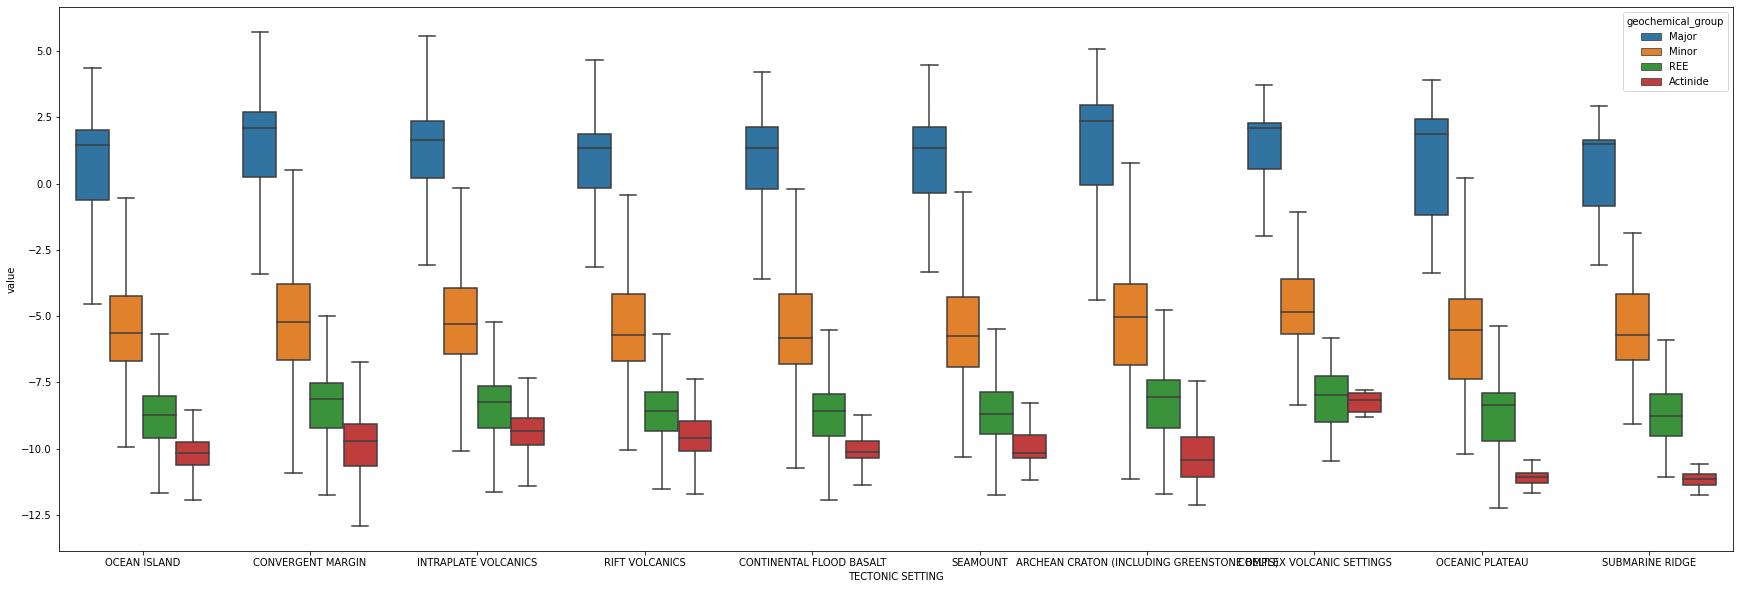

In [320]:
plt.figure(figsize=(30,10))
sns.boxplot(x=tectonic, y='value', data=vis_basalts, hue='geochemical_group', showfliers=False)
plt.show()

Unfortunatelly - in each tectonic environment, each group of elements is apparently at similar 'level'. Therefore, machine learning is our only hope...

In [374]:
len(tectonic_setting.unique())

10

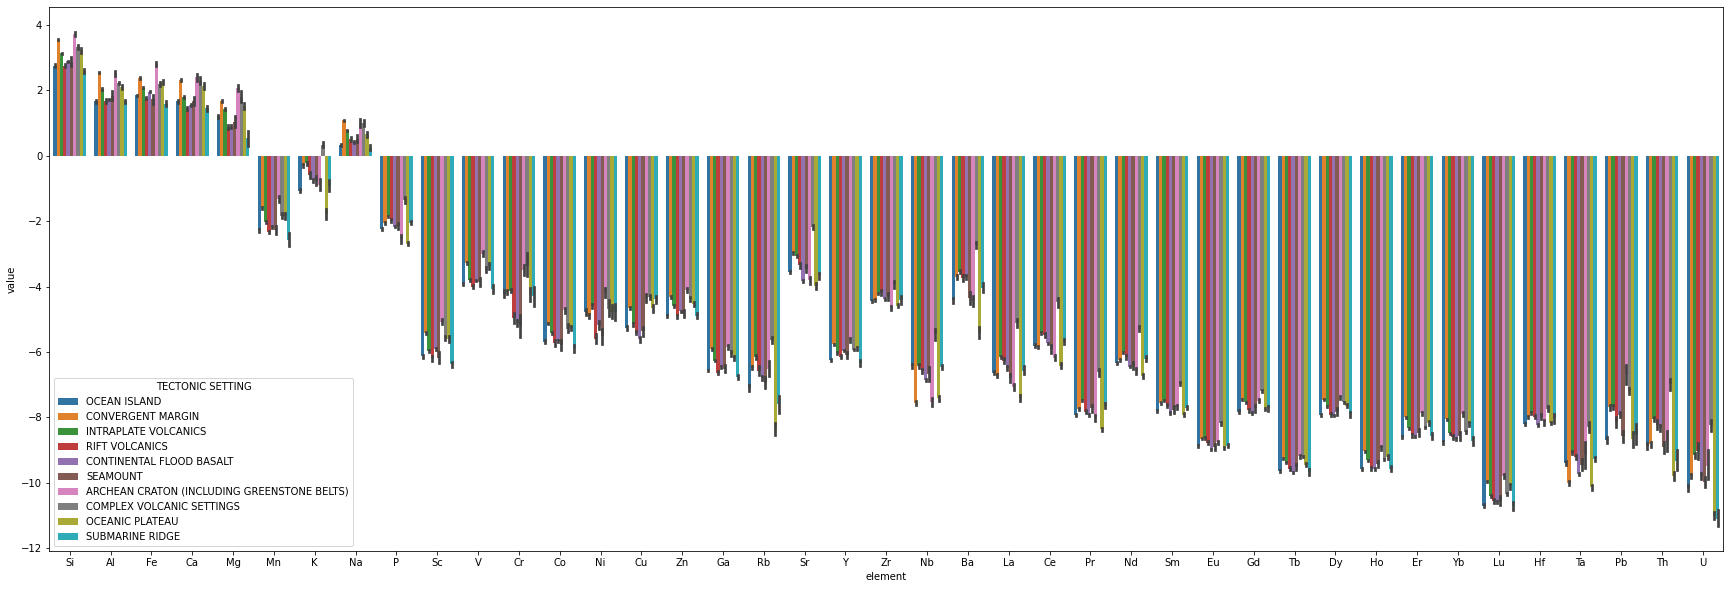

In [379]:
plt.figure(figsize=(30,10))
sns.barplot(x="element", y="value", data=vis_basalts, hue=tectonic)
plt.show()

So, most of the plots with the data we want to inspect are rather uninformative due to multidimensional nature of geochemical analyses. Best thing to do, is to inspect only the trace element data.

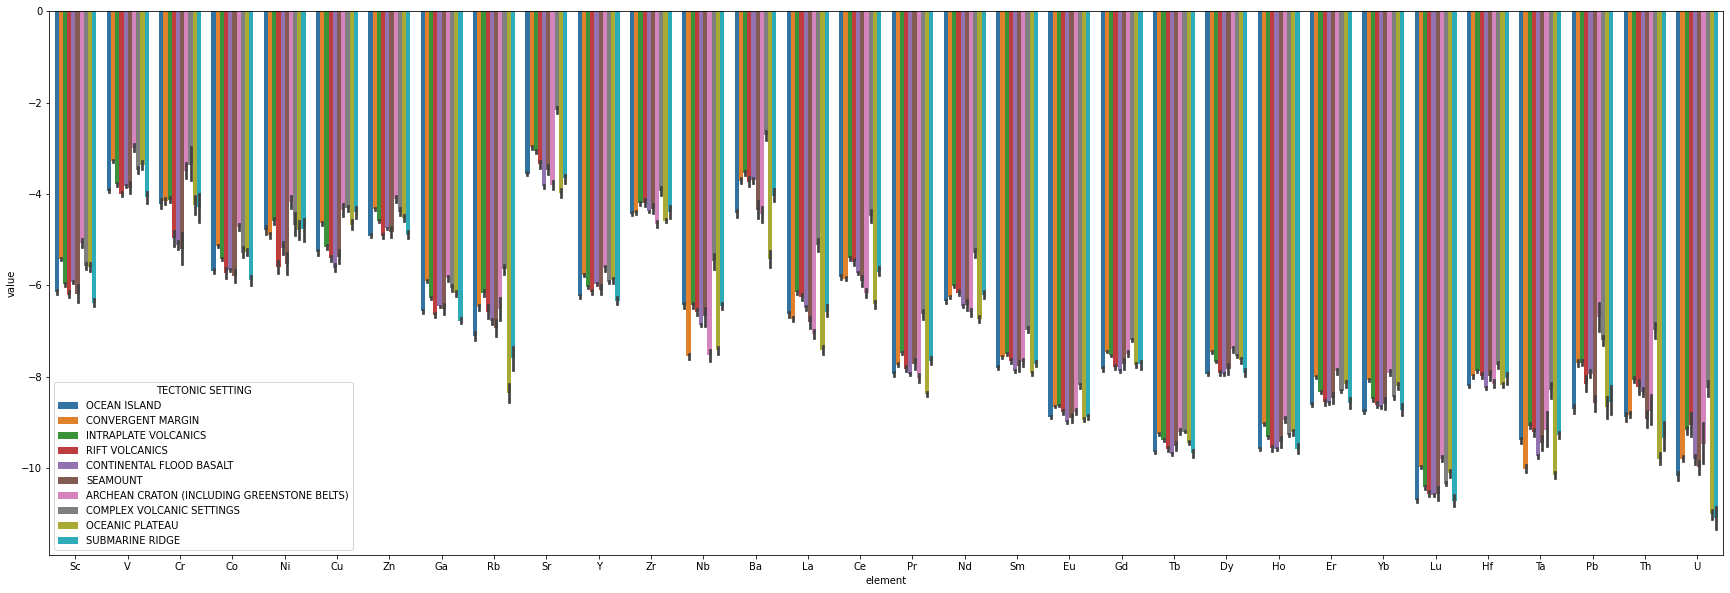

In [386]:
vis_basalts_trace = vis_basalts[vis_basalts["element"].isin(trace_names)]

plt.figure(figsize=(30,10))
sns.barplot(x="element", y="value", data=vis_basalts_trace, hue=tectonic)
plt.show()

Well.. Still hard to read. However, let's try doing more informative plots.

#### Correlation heatmap
[Up](#Basalts-classification-project)

To visualize correlation between elements, we will use Spearman correlation coefficent - which is recommended in geochemistry more than Pearson's correlation coefficent (see: Rollinson, 1993)

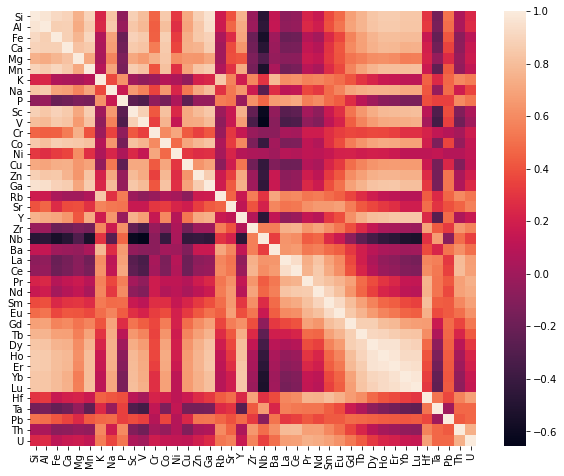

In [161]:
correlation = basalts.corr('spearman')
plt.figure(figsize=(10,8))
sns.heatmap(correlation)

We see that there are some strong correlations between some of the elements. When performing machine learning we will see, how PCA will influence that.

#### Plotting data with use of PCA
[Up](#Basalts-classification-project)

Because our data is multi-dimensional (we are using 41 columns with different chemical elements), we were not able to visualize these data properly. We will reduce dimensionality then. We will perform PCA and then visualize our results.

In [78]:
x = basalts
y = tectonic_setting

In [79]:
pca = PCA(n_components=2)
dane = pca.fit(x)
x_pca = pca.fit_transform(x)

In [80]:
labels = y.values

###### PCA scatterplot

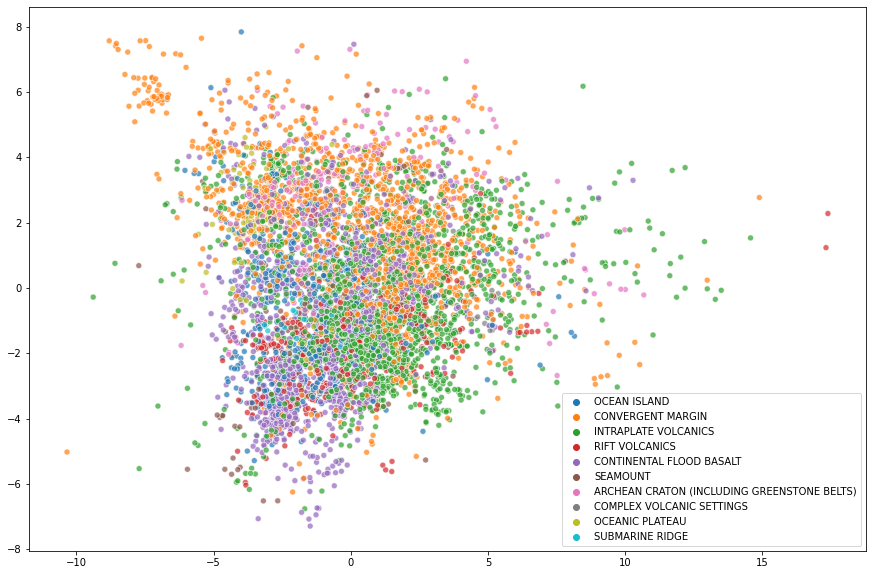

In [100]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels, alpha=0.7)
plt.show()

#### Plotting data with use of LDA (linear discriminant analysis)
[Up](#Basalts-classification-project)

Linear discriminant analysis (LDA) is alternative method of dimensionality reduction to PCA. When PCA identifies the attributes' combination that account for most of variance in the data, LDA is rather supervised method, that tries to find attributes that account for most variance between classes. This method is based on simple probabilistic model and similar method was already used by Pearce (1976) for basalt classification. Therefore, we will try out this method.

In [167]:
lda = LinearDiscriminantAnalysis(n_components=2)
dane = lda.fit(x, y)
x_lda = lda.fit_transform(x, y)

In [168]:
labels = y.values

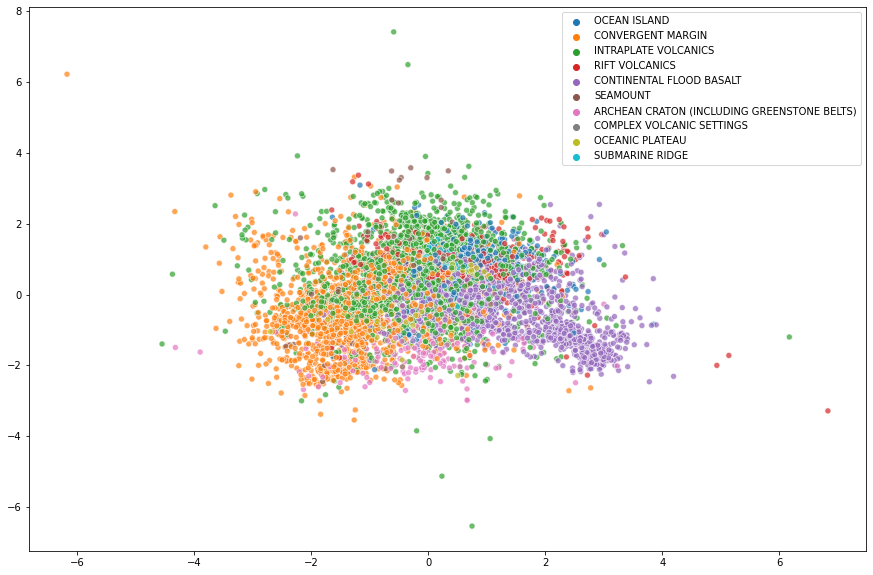

In [170]:
sns.scatterplot(x=x_lda[:,0], y=x_lda[:,1], hue=labels, alpha=0.7)
plt.show()

### Classification
[Up](#Basalts-classification-project)

So now, it's time for classification of basalts. First - we will perform classification with explicitly specified paramterers, then we will try classify the data using different parameters with all the classifiers used before

In [322]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [367]:
x = basalts
y = tectonic_setting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [327]:
def automodel(x, y, model, par_grid, test_size=0.3, scaler=True, cv=5):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    pipelist = [
        ('scaler', StandardScaler()),
        ('model', model)
    ]
    
    # we can not use the sacaler, if we don't want to
    if not scaler:
        pipelist = pipelist[1:]
    pipe = Pipeline(pipelist)
    grid = GridSearchCV(pipe, par_grid, cv=cv)
    grid.fit(x_train, y_train)
    return [grid.best_score_, grid.score(x_test, y_test), grid.best_params_]

#### K-nearest neighbors
[Up](#Basalts-classification-project)

In [369]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
metrics.accuracy_score(knn.predict(x_test), y_test)

0.8040254237288136

Nice result! :) Let's see how our model performed with test data...

In [173]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])
pipe1.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [174]:
pipe2 = Pipeline([
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])
pipe2.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [175]:
pipe3 = Pipeline([
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('knn', KNeighborsClassifier())
])
pipe3.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [176]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('knn', KNeighborsClassifier())
])
pipe4.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

We see that creating pipeline with PCA, LDA and scaler does not improve our model. Moreover - this worsens its performance! It is not surprising however. We saw that on [PCA scatterplot](#PCA-scatterplot) all the data are concentrated in the middle of the plot. This may cause problems with classifying different tectonic environments. We see also that using standard scaler does not siginificantly influence performance of our model.

#### Decision tree
[Up](#Basalts-classification-project)

In [140]:
dtc = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [141]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

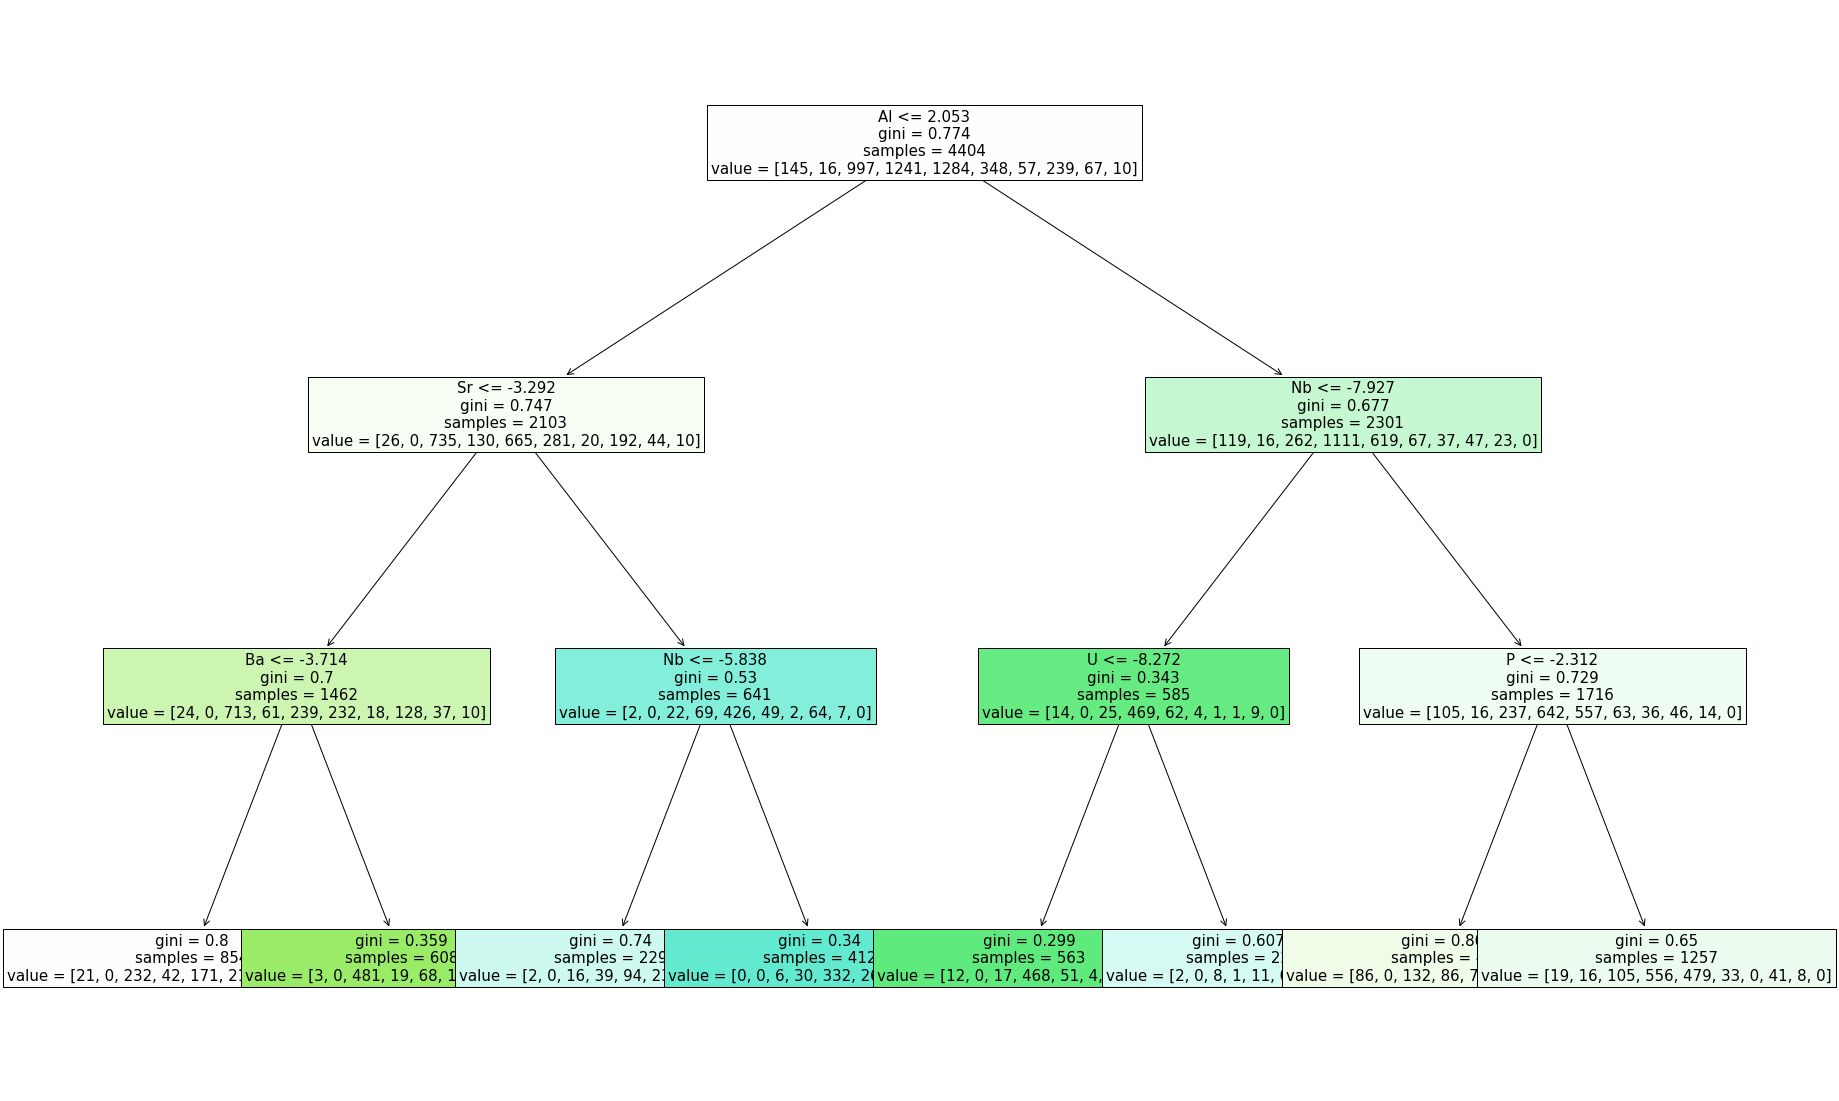

In [145]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtc, fontsize=15, feature_names=x_train.columns, filled=True)
plt.show()

In [146]:
metrics.accuracy_score(dtc.predict(x_test), y_test)

0.5190677966101694

This alghoritm performed worse than KNN. 

In [177]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=5))
])
pipe1.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [178]:
pipe2 = Pipeline([
    ('pca', PCA(n_components=2)),
    ('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=5))
])
pipe2.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [181]:
pipe3 = Pipeline([
    ('pca', LinearDiscriminantAnalysis(n_components=2)),
    ('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=5))
])
pipe3.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [182]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', LinearDiscriminantAnalysis(n_components=2)),
    ('dtc', DecisionTreeClassifier(max_depth=3, min_samples_leaf=5))
])
pipe4.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

The same as in case of KNN - using PCA or LDA does not improve performance and scaler has practically no influence on the results.

#### Random forest
[Up](#Basalts-classification-project)

In [162]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_train, y_train)
metrics.accuracy_score(rfc.predict(x_test), y_test)

0.8463983050847458

It turns out, that random forest is comparably good classifier as K-nearest neighbors, in case of our data.

In [186]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dtc', RandomForestClassifier(n_estimators=300))
])
pipe1.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [185]:
pipe2 = Pipeline([
    ('pca', PCA(n_components=2)),
    ('dtc', RandomForestClassifier(n_estimators=300))
])
pipe2.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [183]:
pipe3 = Pipeline([
    ('pca', LinearDiscriminantAnalysis(n_components=2)),
    ('dtc', RandomForestClassifier(n_estimators=300))
])
pipe3.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

In [184]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', LinearDiscriminantAnalysis(n_components=2)),
    ('dtc', RandomForestClassifier(n_estimators=300))
])
pipe4.fit(x_train, y_train)
metrics.accuracy_score(pipe.predict(x_test), y_test)

0.4639830508474576

Similarly to previous results - scaler does not affect the resutls and dimensionality reduction worsens the algorithm performance.

Now, let's make automated search for the best model with use of these 3 algorithms

In [351]:
models = [
    (KNeighborsClassifier(), {'model__n_neighbors':[3,5,7,9],
                              'model__weights':['uniform', 'distance'],
                              'model__leaf_size':np.linspace(10, 50, 10)}),
    (DecisionTreeClassifier(), {'model__max_depth':[2, 3, 4, 5],
                                'model__criterion':['gini', 'entropy']}),
    (RandomForestClassifier(), {'model__n_estimators':[200, 350, 500, 650, 800],
                                'model__criterion':['gini', 'entropy'],
                                'model__max_depth':[2, 3, 4, 5]})
]

In [352]:
accuracies = []

for model, pgrid in models:
    result = automodel(x, y, model, pgrid)
    accuracies.append([model, pgrid, result[2], result[1], result[0]])

acc_frame = pd.DataFrame(accuracies)
acc_frame.columns = ['model', 'grid', 'best_params', 'acc_train', 'acc_test']

In [353]:
acc_frame

,model,grid,best_params,acc_train,acc_test
0,KNeighborsClassifier(),"{'model__n_neighbors': [3, 5, 7, 9], 'model__w...","{'model__leaf_size': 10.0, 'model__n_neighbors...",0.840042,0.834469
1,DecisionTreeClassifier(),"{'model__max_depth': [2, 3, 4, 5], 'model__cri...","{'model__criterion': 'gini', 'model__max_depth...",0.615996,0.587874
2,RandomForestClassifier(),"{'model__n_estimators': [200, 350, 500, 650, 8...","{'model__criterion': 'entropy', 'model__max_de...",0.631356,0.640101


In [359]:
acc_frame['best_params'][0]

{'model__leaf_size': 10.0,
 'model__n_neighbors': 3,
 'model__weights': 'distance'}

It is not surprising, considering prior attempts, that best-performing model was KNN, with accuracies around 83-84%.

### Results

In [363]:
x = basalts
y = tectonic_setting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [365]:
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=10, weights='distance')
knn.fit(x_train, y_train)
metrics.accuracy_score(knn.predict(x_test), y_test)

0.8384533898305084

In [391]:
pred_results = knn.predict(x_test) == y_test

In [402]:
res_compare = pd.concat([y_test, pred_results], axis=1)
res_compare.columns=[tectonic, 'class']

In [441]:
res_compare = pd.concat([res_compare[tectonic].value_counts(), res_compare.groupby(tectonic).sum()], axis=1)

In [445]:
((res_compare[tectonic] - res_compare['class']) / res_compare[tectonic]).sort_values(ascending=False)

SEAMOUNT                                       0.692308
RIFT VOLCANICS                                 0.372727
ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)    0.338462
OCEANIC PLATEAU                                0.285714
SUBMARINE RIDGE                                0.250000
OCEAN ISLAND                                   0.242604
INTRAPLATE VOLCANICS                           0.242531
CONVERGENT MARGIN                              0.138277
CONTINENTAL FLOOD BASALT                       0.077295
COMPLEX VOLCANIC SETTINGS                      0.000000
dtype: float64

Surprisingly - all the complex volcanic settings were classified correctly (I expected something different, I even thought about removing this environment from analysis as being too complex). There is no clearly visible pattern, which of the settings was most missclassified - however, definitelly seamounts were badly classified (what may be related to relative scarce data). However, the term SEAMOUNT that appeared in the source database is quite ambigious - it is not clear, how this term relates to typical, basaltic environments: should it be considered a guyot or so-called Mid-Ocean Ridge Basalt (which is strongly associated with rifts, therefore most of the data in RIFT VOLCANICS probably represent MORBs). The same is partly true for SUBMARINE RIDGE environment. No matter of that, the model apparently performed well on delivered data and we may consider that a success.

Hope you were having fun :)

## References

- Aitchison, John. "The statistical analysis of compositional data." *Journal of the Royal Statistical Society: Series B (Methodological)* 44.2 (1982): 139-160.  
- Pearce, Julian A. "Statistical analysis of major element patterns in basalts." *Journal of Petrology* 17.1 (1976): 15-43.  
- Rollinson, Hugh R. *Using geochemical data: evaluation, presentation, interpretation.* Routledge, 1993.